<a href="https://colab.research.google.com/github/MineCamci/My_Project_For_Data_Science/blob/main/CRM_Analysis_FLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RFM Analizi ile Müşteri Segmentasyonu** FLO


In [ ]:
###########################################
# PROBLEM OF BUSINESS
###########################################

#Online ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.
#Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.

import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format',lambda x: '%.3f' %x)
df_ = pd.read_csv("flo_data_20k.csv")
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


## **PROJE GÖREVLERİ**
**GÖREV 1**

**STEP 1**: Veri setinde;

a. İlk 10 gözlem,

b. Değişken isimleri,

c. Betimsel istatistik,

d. Boş değer,

e. Değişken tipleri, incelemesi yapınız.

In [ ]:
df["order_channel"].value_counts()

Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64

In [ ]:
df["last_order_channel"].value_counts()

Android App    6783
Offline        6608
Mobile         3172
Ios App        1696
Desktop        1686
Name: last_order_channel, dtype: int64

In [ ]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [ ]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


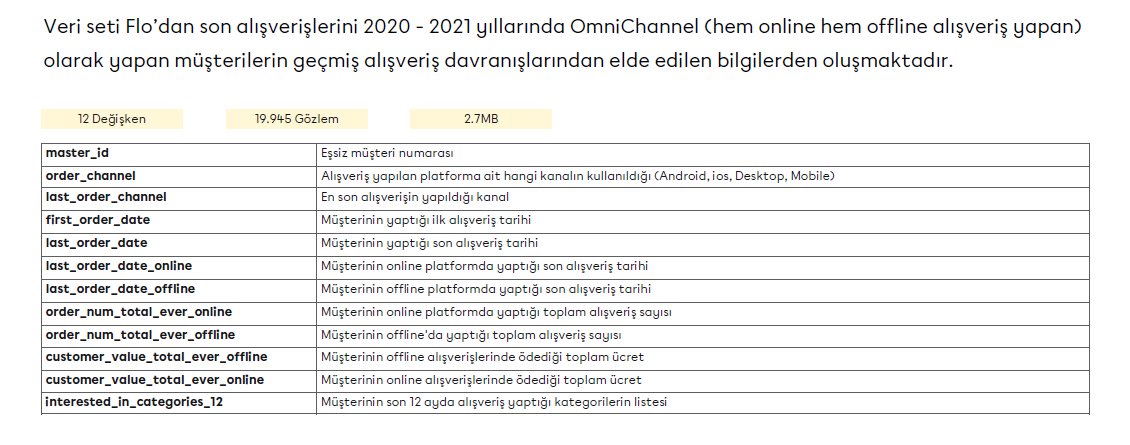

In [ ]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
df.shape

(19945, 12)

**STEP 2** : Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [ ]:
df["Order_Num_Total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

In [ ]:
df["Customer_Value_Total"] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

In [ ]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Order_Num_Total,Customer_Value_Total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


**STEP 3:** Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [ ]:
import datetime as dt
df["first_order_date"] = pd.to_datetime(df["first_order_date"], format = '%Y/%m/%d')
df["last_order_date"] = pd.to_datetime(df["last_order_date"], format = '%Y/%m/%d')
df["last_order_date_online"] = pd.to_datetime(df["last_order_date_online"], format = '%Y/%m/%d')
df["last_order_date_offline"] = pd.to_datetime(df["last_order_date_offline"], format = '%Y/%m/%d')

 **STEP 4:** Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.
date_columns = df.columns[df.columns.str.contains("date")]

df[date_columns] = df[date_columns].apply(pd.to_datetime)

df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

**STEP 4 :** Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

In [ ]:
df.groupby("order_channel").agg({"master_id":"count",
                                 "Order_Num_Total":"sum",
                                 "Customer_Value_Total":"sum"})

,master_id,Order_Num_Total,Customer_Value_Total
order_channel,,,
Android App,9495,52269.000,7819062.760
Desktop,2735,10920.000,1610321.460
Ios App,2833,15351.000,2525999.930
Mobile,4882,21679.000,3028183.160


**STEP 5:** En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.

In [ ]:
df["Customer_Value_Total"].sort_values(ascending=False).head(10)

11150   45905.100
4315    36818.290
7613    33918.100
13880   31227.410
9055    20706.340
7330    18443.570
8068    16918.570
163     12726.100
7223    12282.240
18767   12103.150
Name: Customer_Value_Total, dtype: float64

In [ ]:
#df.sort_values("Customer_Value_Total", ascending=False).head(10)

**ÖNEMLİ NOT:** df.sort_values("customer_value_total", ascending=False)[:10]

Bu şekilde de "En çok kazancı sağlayan ilk 10 müşteriyi" getiriyor ama bu tablo şeklinde istenilen müşterilerin diğer değişkenlerini de gösteriyor.

Yukardakinde sadece "En çok kazancı sağlayan müşterileri" getirdi toplam ücretlerle diğer değişkenler yok

**STEP 6:** En fazla siparişi veren ilk 10 müşteriyi sıralayınız.

In [ ]:
df.sort_values("Order_Num_Total", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Order_Num_Total,Customer_Value_Total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],88.000,8572.230
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],83.000,4240.360
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",77.000,5184.050
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.000,5297.880
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570


In [ ]:
df["Order_Num_Total"].sort_values(ascending=False).head(10)

11150   202.000
7223    131.000
8783    111.000
2619     88.000
6322     83.000
7613     82.000
9347     77.000
10954    75.000
8068     70.000
7330     70.000
Name: Order_Num_Total, dtype: float64

**STEP 7:** Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [ ]:
def data_prep(dataframe):
    dataframe["Order_Num_Total"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["Customer_Value_Total"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    return df

In [ ]:
data_prep(df)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Order_Num_Total,Customer_Value_Total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.000,2.000,289.980,111.980,"[ERKEK, AKTIFSPOR]",3.000,401.960
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.000,1.000,150.480,239.990,[AKTIFSPOR],2.000,390.470
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.000,1.000,139.980,492.960,[AKTIFSPOR],3.000,632.940
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.000,5.000,711.790,297.980,"[ERKEK, AKTIFSPOR]",6.000,1009.770


#**GÖREV 2:** RFM Metriklerinin Hesaplanması

**STEP 1:** Recency, Frequency ve Monetary tanımlarını yapınız.

In [ ]:
df['last_order_date'].max()

Timestamp('2021-05-30 00:00:00')

In [ ]:
analysis_date = dt.datetime(2021,6,1)

In [ ]:
# customer_id, recency, frequnecy ve monetary değerlerinin yer aldığı yeni bir rfm dataframe
RFM = pd.DataFrame()
RFM["customer_id"] = df["master_id"]
RFM["Recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[D]')
RFM["Frequency"] = df["Order_Num_Total"]
RFM["Monetary"] = df["Customer_Value_Total"]

RFM.head()

,customer_id,Recency,Frequency,Monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.000,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.000,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.000,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.000,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.000,2.000,209.980


In [ ]:
#RFM = df.groupby("master_id").agg({"last_order_date" : lambda x: (analysis_date - x.max()).days,
#                                   "Order_Num_Total" : lambda y: y.nunique(),
#                                   "Customer_Value_Total" : lambda z: z.sum()})

In [ ]:
#RFM.columns = ["Recency","Frequency","Monetary"]

In [ ]:
#RFM

# **GÖREV 3** : RF Skorunun Hesaplanması
**STEP 1:** Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

In [ ]:
RFM["Recency_Score"] = pd.qcut(RFM['Recency'], 5, labels= [5,4,3,2,1])
RFM.head()

,customer_id,Recency,Frequency,Monetary,Recency_Score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.000,5.000,939.370,3
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.000,21.000,2013.550,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.000,5.000,585.320,2
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.000,2.000,121.970,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.000,2.000,209.980,3


In [ ]:
RFM["Frequency_Score"] = pd.qcut(RFM['Frequency'].rank(method="first"), 5, labels= [1,2,3,4,5])
RFM["Monetary_Score"] = pd.qcut(RFM['Monetary'], 5, labels= [1,2,3,4,5])
RFM.head()

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.000,5.000,939.370,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.000,21.000,2013.550,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.000,5.000,585.320,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.000,2.000,121.970,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.000,2.000,209.980,3,1,1


In [ ]:
RFM["RF_SCORE"] = (RFM["Recency_Score"].astype(str)+RFM['Frequency_Score'].astype(str))

In [ ]:
RFM.head()

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.000,5.000,939.370,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.000,21.000,2013.550,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.000,5.000,585.320,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.000,2.000,121.970,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.000,2.000,209.980,3,1,1,31


#**GÖREV 4:** RF Skorunun Segment Olarak Tanımlanması

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions' }

In [ ]:
RFM["SEGMENT"] = RFM["RF_SCORE"].replace(seg_map,regex=True)
RFM.head()

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_SCORE,SEGMENT
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.000,5.000,939.370,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.000,21.000,2013.550,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.000,5.000,585.320,2,4,3,24,at_risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.000,2.000,121.970,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.000,2.000,209.980,3,1,1,31,about_to_sleep


In [ ]:
RFM[["SEGMENT","Recency","Frequency","Monetary"]].groupby("SEGMENT").agg({"mean"})

,Recency,Frequency,Monetary
,mean,mean,mean
SEGMENT,,,
about_to_sleep,113.785,2.401,359.009
at_risk,241.607,4.472,646.610
cant_loose,235.444,10.698,1474.468
champions,17.107,8.934,1406.625
hibernating,247.950,2.394,366.267
loyal_customers,82.595,8.375,1216.819
need_attention,113.829,3.728,562.143
new_customers,17.918,2.000,339.956


In [ ]:
 #RFM.groupby("SEGMENT")["Recency","Frequency","Monetary"].agg({"mean"})

#**GÖREV 5:** Aksiyon Zamanı
a) Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

b)Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni
gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [ ]:
#a)

RFM.head()

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_SCORE,SEGMENT
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.000,5.000,939.370,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.000,21.000,2013.550,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.000,5.000,585.320,2,4,3,24,at_risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.000,2.000,121.970,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.000,2.000,209.980,3,1,1,31,about_to_sleep


In [ ]:
#interested_in_categories_12

In [ ]:
target_segments_customer_ids = RFM[RFM["SEGMENT"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) &(df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]
cust_ids.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)


In [ ]:
#b)
#Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte
#iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni
#gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [ ]:
target_segments_customer_ids = RFM[RFM["SEGMENT"].isin(["cant_loose","hibernating","new_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) &(df["interested_in_categories_12"].str.contains("ERKEK")|df["interested_in_categories_12"].str.contains("COCUK"))]["master_id"]
cust_ids.to_csv("Erkek_Cocuk_40_İndirim.csv", index=False)